In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wmt_df = pd.read_csv("WMT.csv")
train_df = pd.read_csv("train.csv")
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")
test_df = pd.read_csv("test.csv")


dataframes = {
    "WMT Stock Prices": wmt_df,
    "Sales Performance (Train)": train_df,
    "Features": features_df,
    "Stores": stores_df,
    "Sales Performance (Test)": test_df
}

for name, df in dataframes.items():
    print(f"{name} - First 5 rows:")
    print(df.head(), "\n")


WMT Stock Prices - First 5 rows:
         Date      Open      High       Low     Close  Adj Close   Volume
0  1972-08-25  0.063477  0.064697  0.063477  0.064453   0.036175  2508800
1  1972-08-28  0.064453  0.064941  0.064209  0.064209   0.036038   972800
2  1972-08-29  0.063965  0.063965  0.063477  0.063477   0.035627  1945600
3  1972-08-30  0.063477  0.063477  0.062988  0.063477   0.035627   409600
4  1972-08-31  0.062988  0.062988  0.062500  0.062500   0.035079   870400 

Sales Performance (Train) - First 5 rows:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False 

Features - First 5 rows:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN  

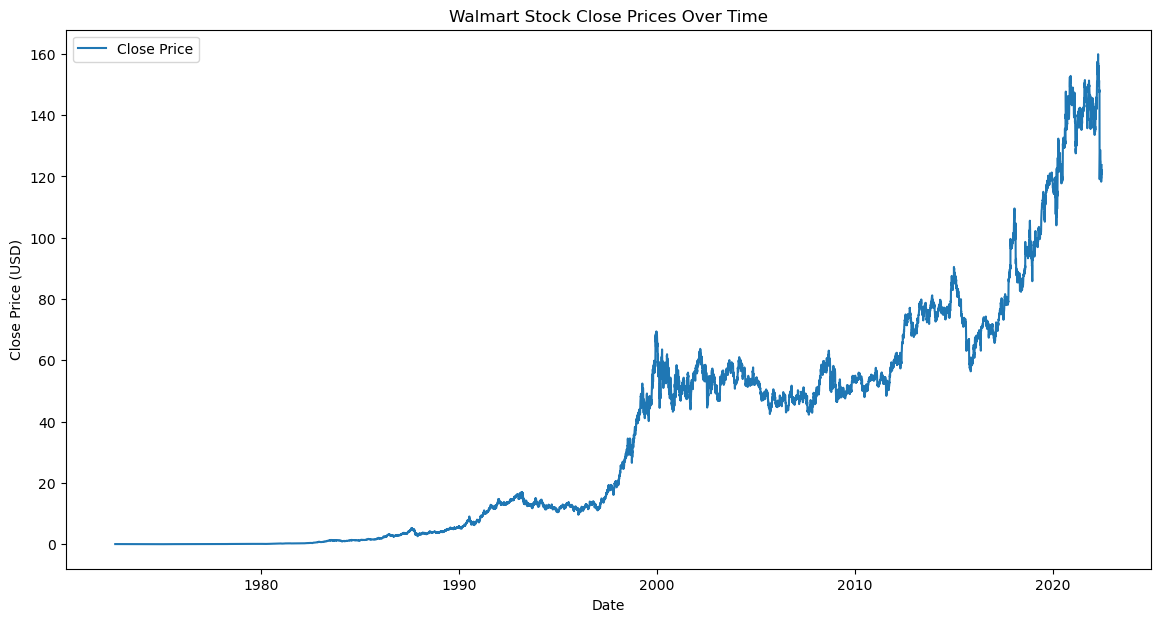

In [38]:
plt.figure(figsize=(14, 7))
plt.plot(wmt_df['Date'], wmt_df['Close'], label='Close Price')
plt.title('Walmart Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


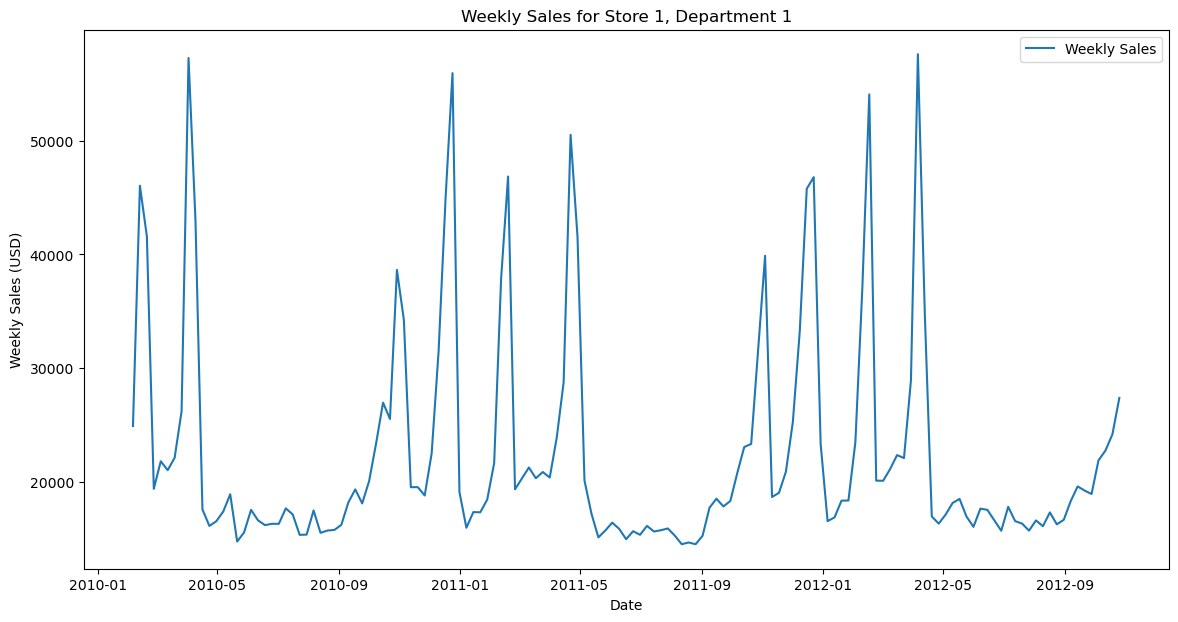

In [4]:

sales_example = train_df[(train_df['Store'] == 1) & (train_df['Dept'] == 1)]

plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(sales_example['Date']), sales_example['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales for Store 1, Department 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (USD)')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Weekly Sales and Temperature over Time for Store 1')

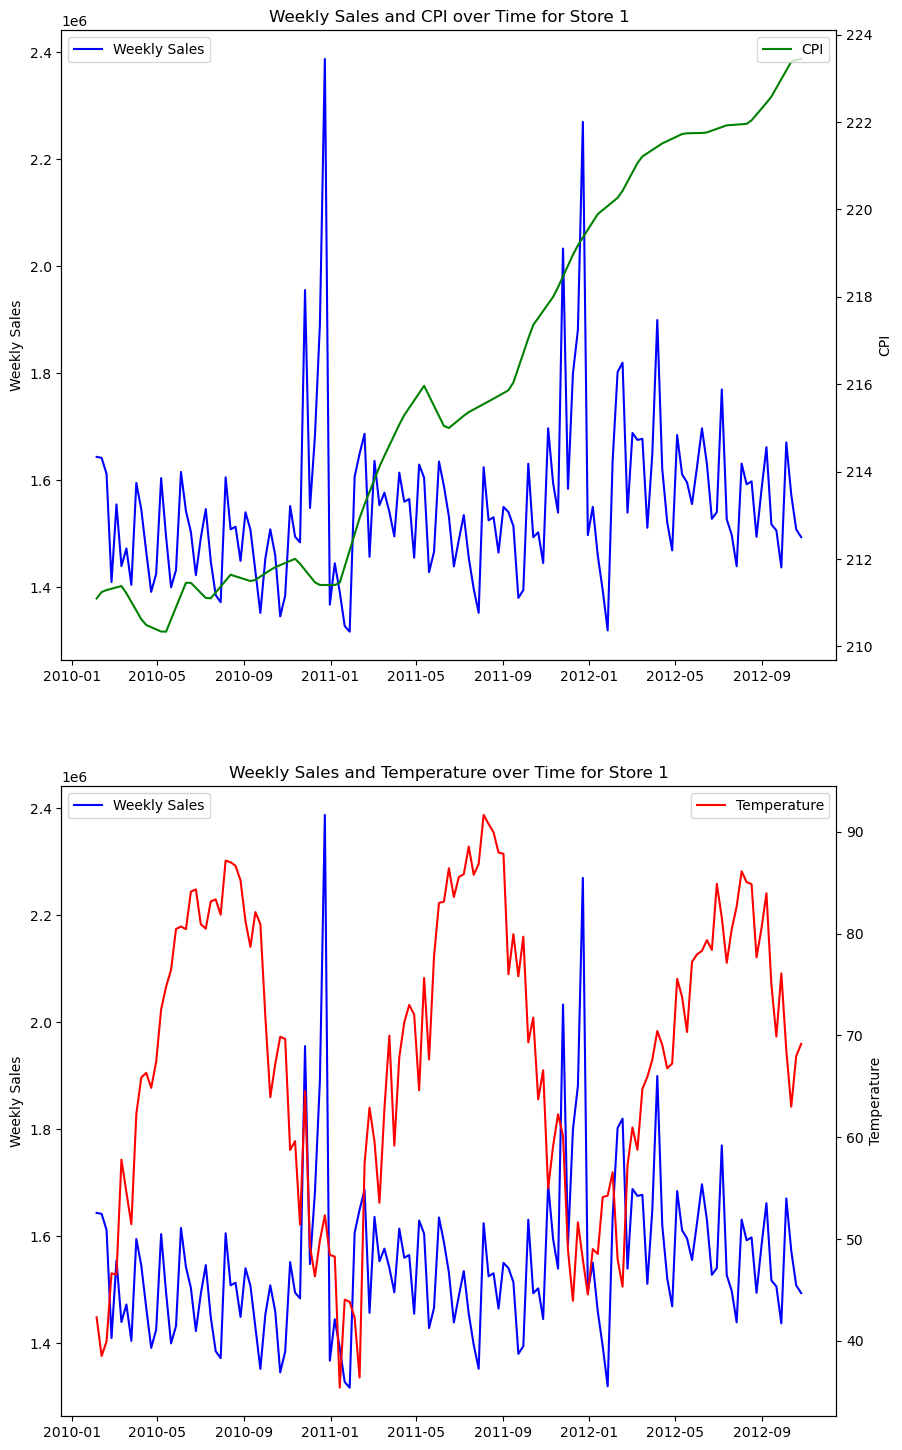

In [37]:
sales_agg = train_df[train_df['Store'] == 1].groupby('Date')['Weekly_Sales'].sum().reset_index()
sales_agg['Date'] = pd.to_datetime(sales_agg['Date'])

features_filtered = features_df[features_df['Store'] == 1][['Date', 'CPI', 'Temperature']]
features_filtered['Date'] = pd.to_datetime(features_filtered['Date'])
analysis_df = pd.merge(sales_agg, features_filtered, how='left', on='Date')
correlations = analysis_df[['Weekly_Sales', 'CPI', 'Temperature']].corr()

fig, axs = plt.subplots(2, 1, figsize=(10, 18))

axs[0].plot(analysis_df['Date'], analysis_df['Weekly_Sales'], label='Weekly Sales', color='blue')
axs[0].set_ylabel('Weekly Sales')
axs[0].legend(loc='upper left')
ax1 = axs[0].twinx()
ax1.plot(analysis_df['Date'], analysis_df['CPI'], label='CPI', color='green')
ax1.set_ylabel('CPI')
ax1.legend(loc='upper right')
axs[0].set_title('Weekly Sales and CPI over Time for Store 1')

axs[1].plot(analysis_df['Date'], analysis_df['Weekly_Sales'], label='Weekly Sales', color='blue')
axs[1].set_ylabel('Weekly Sales')
axs[1].legend(loc='upper left')
ax2 = axs[1].twinx()
ax2.plot(analysis_df['Date'], analysis_df['Temperature'], label='Temperature', color='red')
ax2.set_ylabel('Temperature')
ax2.legend(loc='upper right')
axs[1].set_title('Weekly Sales and Temperature over Time for Store 1')



Consumer Price Index(CPI) is a measure of the average change overtime in the prices paid by consumers.

Temperature can be used since sales could fluctuate due to seasons. Lower temperature during the ends of the years suggests that it's Christmas/NewYears, thus people buy more gifts and hoard more supplies. 

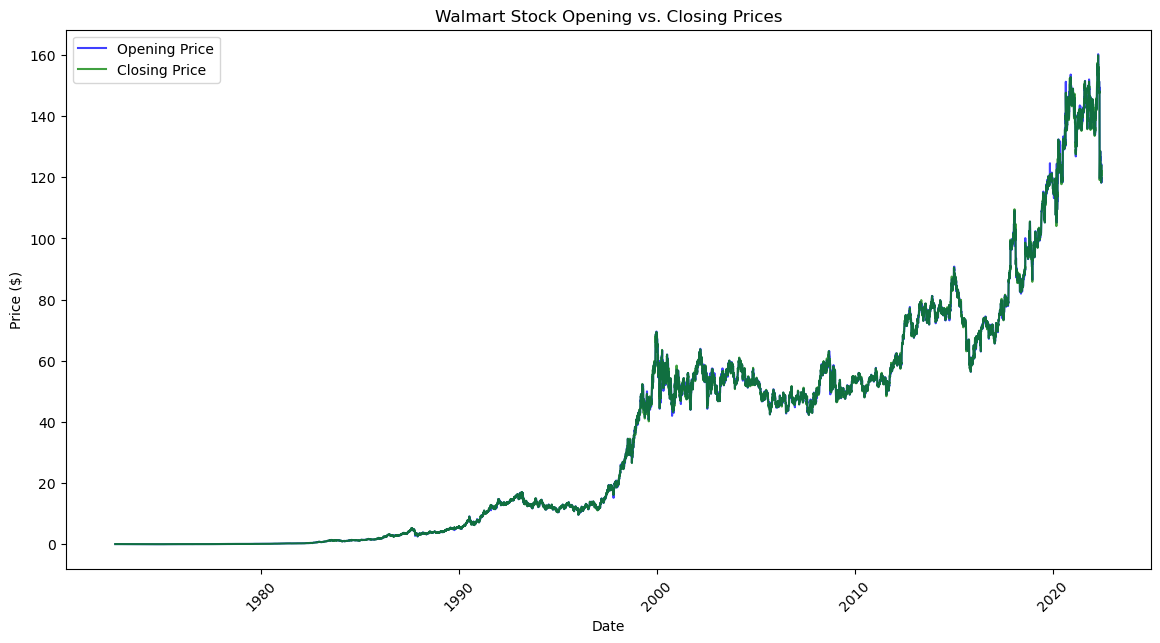

In [6]:
wmt_df['Date'] = pd.to_datetime(wmt_df['Date'])

plt.figure(figsize=(14, 7))
plt.plot(wmt_df['Date'], wmt_df['Open'], label='Opening Price', color='blue', alpha=0.75)
plt.plot(wmt_df['Date'], wmt_df['Close'], label='Closing Price', color='green', alpha=0.75)
plt.title('Walmart Stock Opening vs. Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

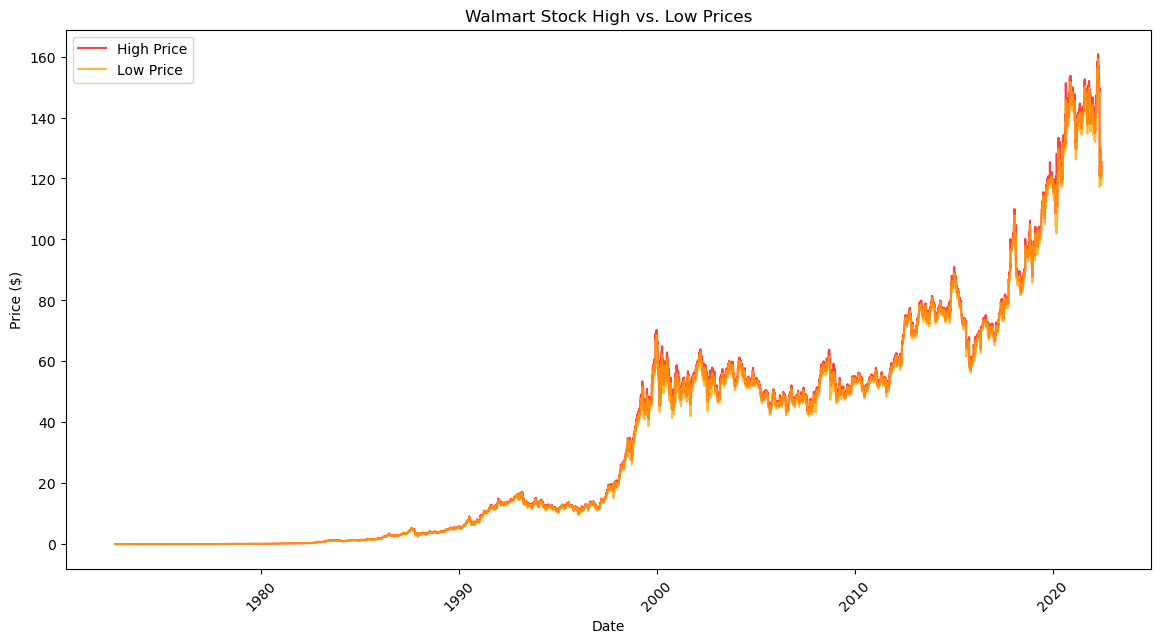

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(wmt_df['Date'], wmt_df['High'], label='High Price', color='red', alpha=0.75)
plt.plot(wmt_df['Date'], wmt_df['Low'], label='Low Price', color='orange', alpha=0.75)
plt.title('Walmart Stock High vs. Low Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


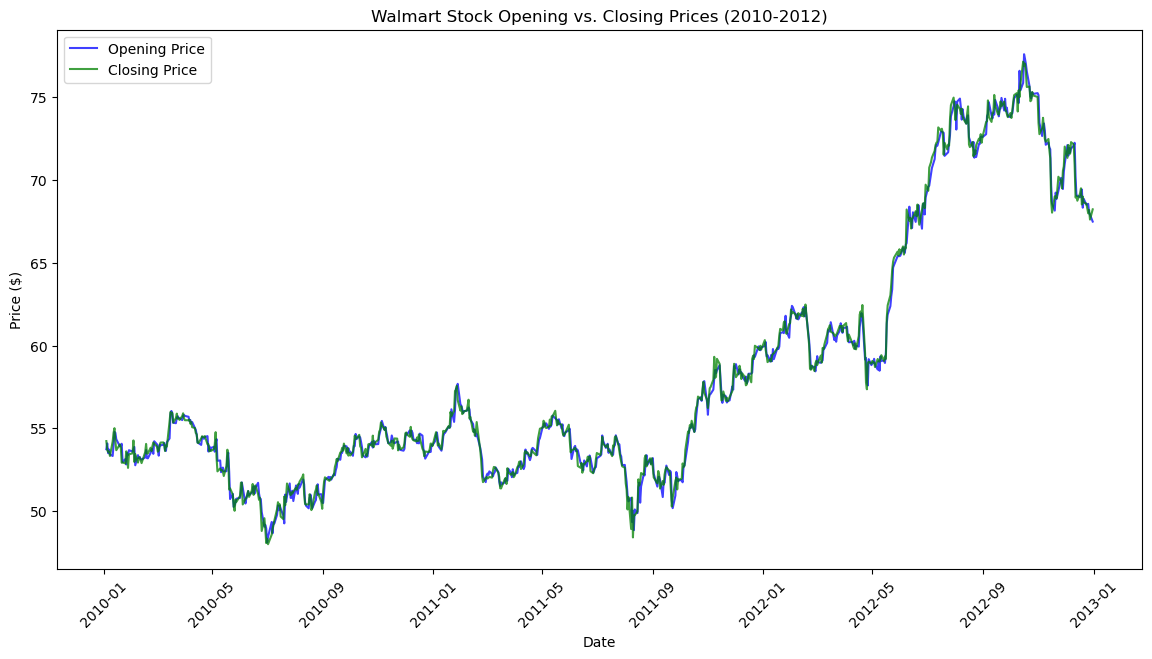

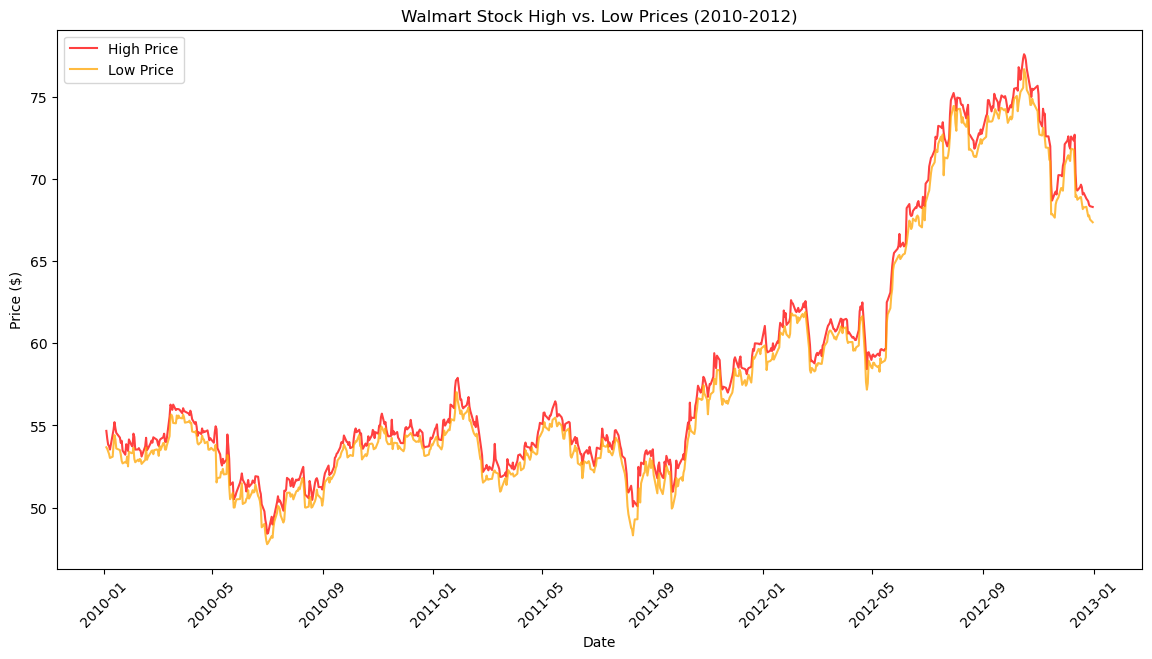

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


wmt_df['Date'] = pd.to_datetime(wmt_df['Date'])
filtered_wmt_df = wmt_df[(wmt_df['Date'] >= pd.Timestamp('2010-01-01')) & (wmt_df['Date'] <= pd.Timestamp('2012-12-31'))]


plt.figure(figsize=(14, 7))
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['Open'], label='Opening Price', color='blue', alpha=0.75)
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['Close'], label='Closing Price', color='green', alpha=0.75)
plt.title('Walmart Stock Opening vs. Closing Prices (2010-2012)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['High'], label='High Price', color='red', alpha=0.75)
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['Low'], label='Low Price', color='orange', alpha=0.75)
plt.title('Walmart Stock High vs. Low Prices (2010-2012)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


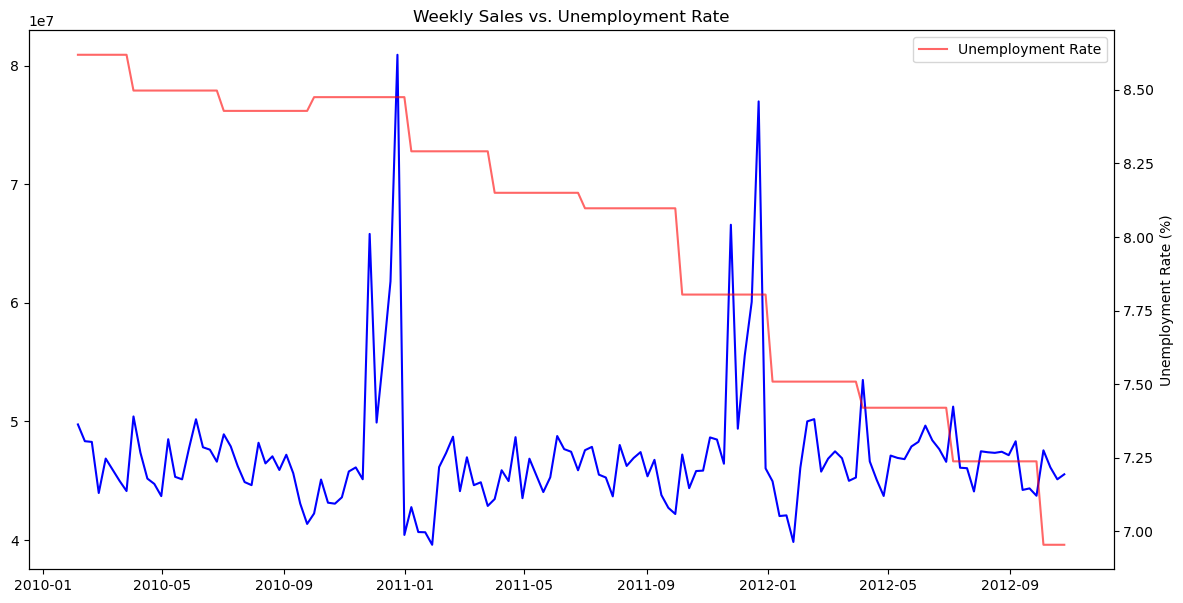

In [9]:
features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
agg_features_df = features_df.groupby('Date')['Unemployment'].mean().reset_index()
agg_train_df = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
merged_df = pd.merge(agg_features_df, agg_train_df, on='Date')


plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['Weekly_Sales'], label='Weekly Sales', color='blue')
ax2 = plt.twinx()
ax2.plot(merged_df['Date'], merged_df['Unemployment'], label='Unemployment Rate', color='red', alpha=0.6)

plt.title('Weekly Sales vs. Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
ax2.set_ylabel('Unemployment Rate (%)')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


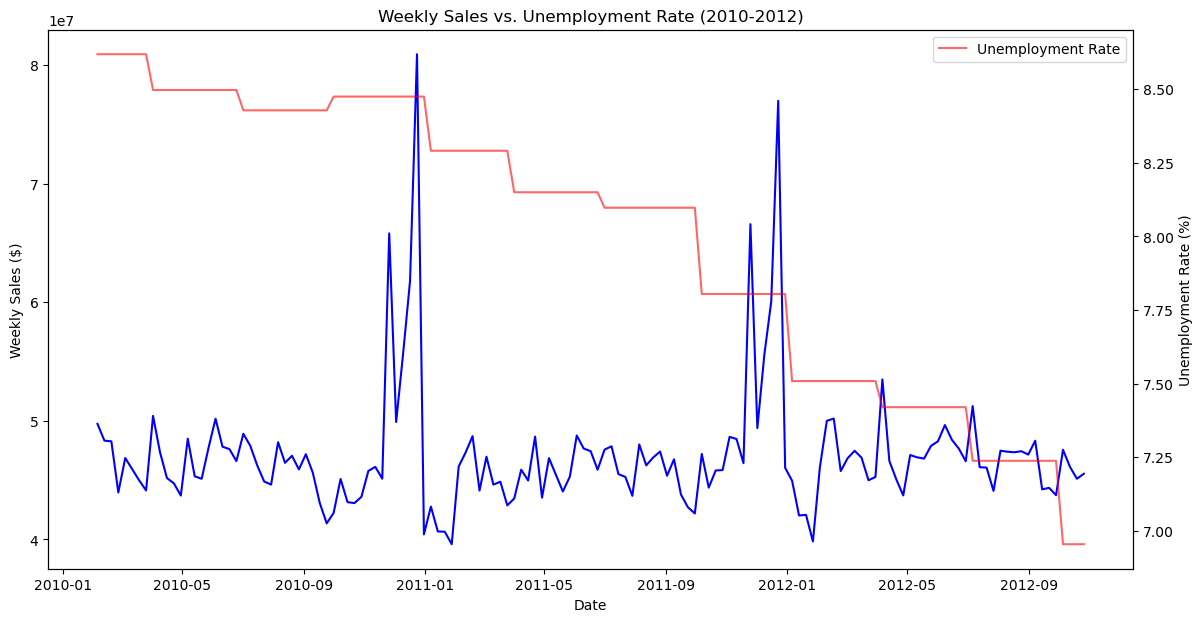

In [10]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

filtered_merged_df = merged_df[(merged_df['Date'] >= pd.Timestamp('2010-01-01')) & (merged_df['Date'] <= pd.Timestamp('2012-12-31'))]
plt.figure(figsize=(14, 7))

plt.plot(filtered_merged_df['Date'], filtered_merged_df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')

ax2 = plt.gca().twinx()
ax2.plot(filtered_merged_df['Date'], filtered_merged_df['Unemployment'], label='Unemployment Rate', color='red', alpha=0.6)
ax2.set_ylabel('Unemployment Rate (%)')

plt.title('Weekly Sales vs. Unemployment Rate (2010-2012)')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [11]:
import pandas as pd

features_df = pd.read_csv('features.csv')
train_df = pd.read_csv('train.csv')

features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])

features_df['YearWeek'] = features_df['Date'].dt.strftime('%Y-%U')
train_df['YearWeek'] = train_df['Date'].dt.strftime('%Y-%U')


agg_features = features_df.groupby('YearWeek')['Unemployment'].mean().reset_index()
agg_sales = train_df.groupby('YearWeek')['Weekly_Sales'].sum().reset_index()

merged_df = pd.merge(agg_sales, agg_features, on='YearWeek')


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = merged_df[['Unemployment']]
y = merged_df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2}')


R² Score: -0.06840749767354937


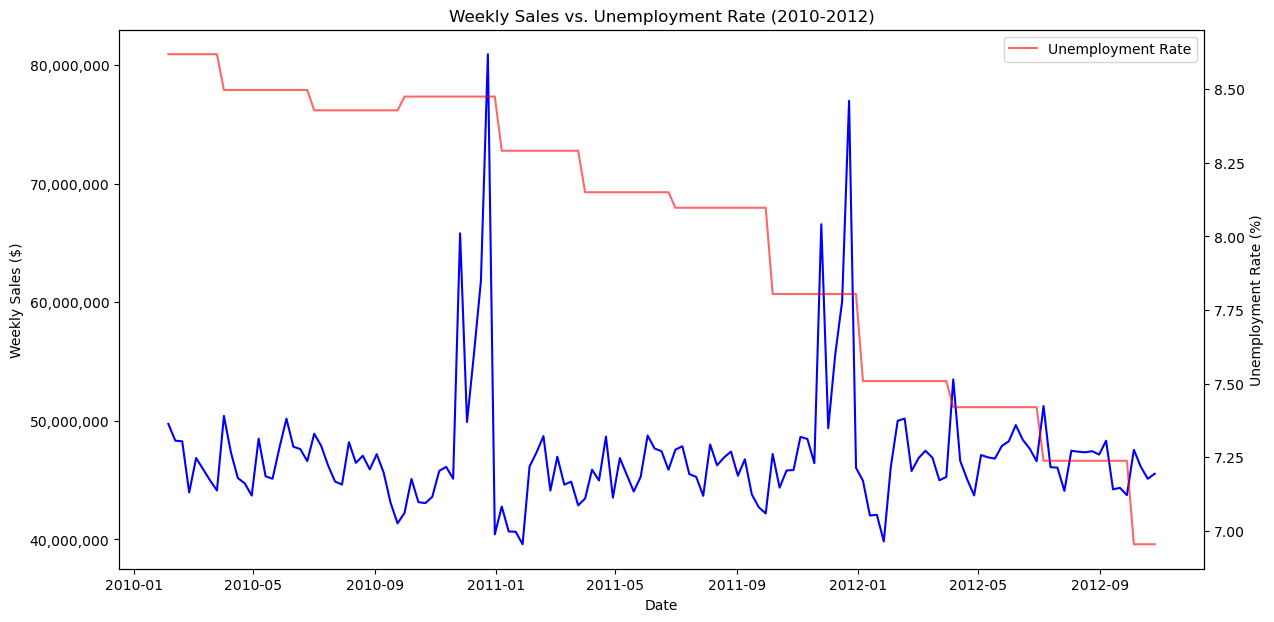

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(14, 7))

plt.plot(filtered_merged_df['Date'], filtered_merged_df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')

plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2 = plt.gca().twinx()
ax2.plot(filtered_merged_df['Date'], filtered_merged_df['Unemployment'], label='Unemployment Rate', color='red', alpha=0.6)
ax2.set_ylabel('Unemployment Rate (%)')

plt.title('Weekly Sales vs. Unemployment Rate (2010-2012)')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [17]:
features_df = pd.read_csv('features.csv')
train_df = pd.read_csv('train.csv')


features_df_filtered = features_df.dropna(subset=['CPI'])


features_df_filtered['Date'] = pd.to_datetime(features_df_filtered['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])

agg_features_df = features_df_filtered.groupby('Date')['CPI'].mean().reset_index()


agg_sales_df = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()


merged_df = pd.merge(agg_sales_df, agg_features_df, on='Date')


merged_df.head()


C:\Users\longa\AppData\Local\Temp\ipykernel_40508\1985296544.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df_filtered['Date'] = pd.to_datetime(features_df_filtered['Date'])


,Date,Weekly_Sales,CPI
0,2010-02-05,49750740.50,167.730885
1,2010-02-12,48336677.63,167.825608
2,2010-02-19,48276993.78,167.871686
3,2010-02-26,43968571.13,167.909657
4,2010-03-05,46871470.30,167.947628


In [18]:
import pandas as pd


features_df = pd.read_csv('features.csv')
train_df = pd.read_csv('train.csv')

features_df_filtered = features_df.dropna(subset=['CPI']).copy()
features_df_filtered['Date'] = pd.to_datetime(features_df_filtered['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])

agg_features_df = features_df_filtered.groupby('Date')['CPI'].mean().reset_index()
agg_sales_df = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
merged_df = pd.merge(agg_sales_df, agg_features_df, on='Date')
print(merged_df.head())


        Date  Weekly_Sales         CPI
0 2010-02-05   49750740.50  167.730885
1 2010-02-12   48336677.63  167.825608
2 2010-02-19   48276993.78  167.871686
3 2010-02-26   43968571.13  167.909657
4 2010-03-05   46871470.30  167.947628


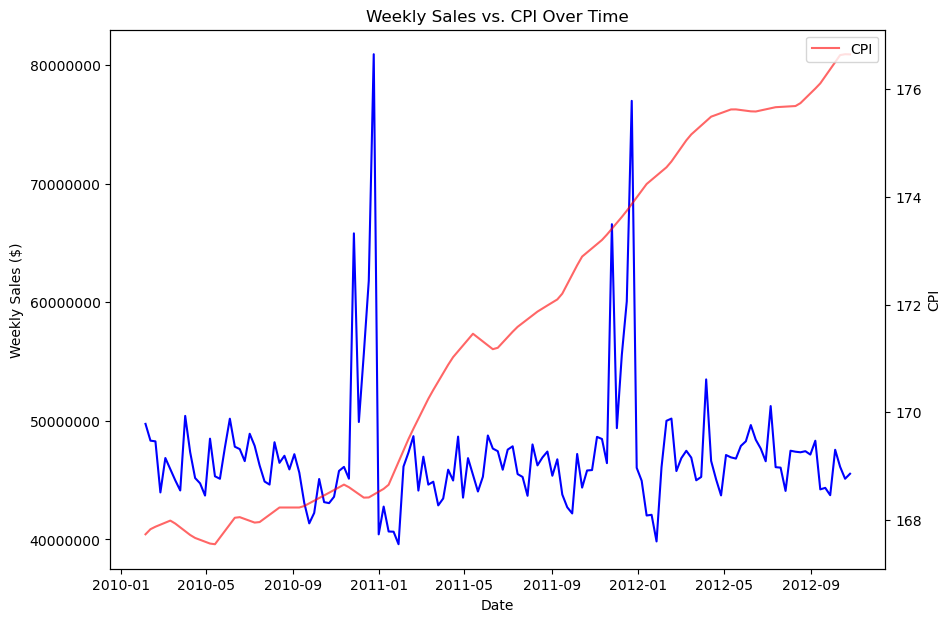

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(merged_df['Date'], merged_df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')

plt.ticklabel_format(style='plain', axis='y')  

ax2 = plt.twinx()
ax2.plot(merged_df['Date'], merged_df['CPI'], label='CPI', color='red', alpha=0.6)
ax2.set_ylabel('CPI')

plt.title('Weekly Sales vs. CPI Over Time')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [26]:
features_df['Date'] = pd.to_datetime(features_df['Date'])
wmt_df['Date'] = pd.to_datetime(wmt_df['Date'])
features_2010_2013 = features_df[(features_df['Date'] >= '2010-01-01') & (features_df['Date'] <= '2013-12-31')]
wmt_2010_2013 = wmt_df[(wmt_df['Date'] >= '2010-01-01') & (wmt_df['Date'] <= '2013-12-31')]
merged_data = pd.merge(features_2010_2013, wmt_2010_2013, on='Date', how='inner')
merged_data.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Open,High,Low,Close,Adj Close,Volume
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,52.77,53.529999,52.759998,53.450001,40.073231,15545800
1,2,2010-02-05,40.19,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,52.77,53.529999,52.759998,53.450001,40.073231,15545800
2,3,2010-02-05,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,False,52.77,53.529999,52.759998,53.450001,40.073231,15545800
3,4,2010-02-05,43.76,2.598,NaN,NaN,NaN,NaN,NaN,126.442065,8.623,False,52.77,53.529999,52.759998,53.450001,40.073231,15545800
4,5,2010-02-05,39.70,2.572,NaN,NaN,NaN,NaN,NaN,211.653972,6.566,False,52.77,53.529999,52.759998,53.450001,40.073231,15545800


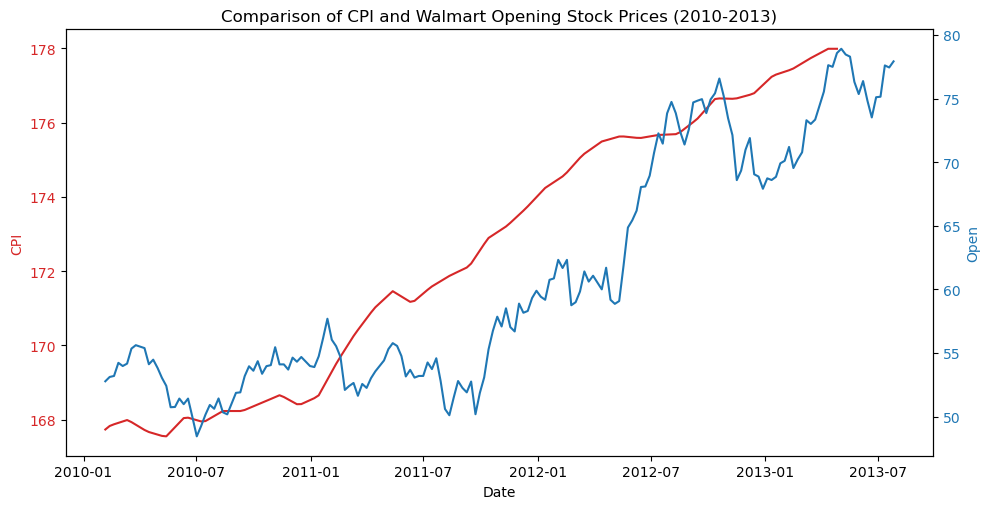

In [25]:
average_cpi_data = features_2010_2013.groupby('Date')['CPI'].mean().reset_index()
merged_data_final = pd.merge(average_cpi_data, wmt_2010_2013[['Date', 'Open']], on='Date', how='inner')

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color=color)
ax1.plot(merged_data_final['Date'], merged_data_final['CPI'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Open', color=color)  
ax2.plot(merged_data_final['Date'], merged_data_final['Open'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Comparison of CPI and Walmart Opening Stock Prices (2010-2013)')
plt.show()


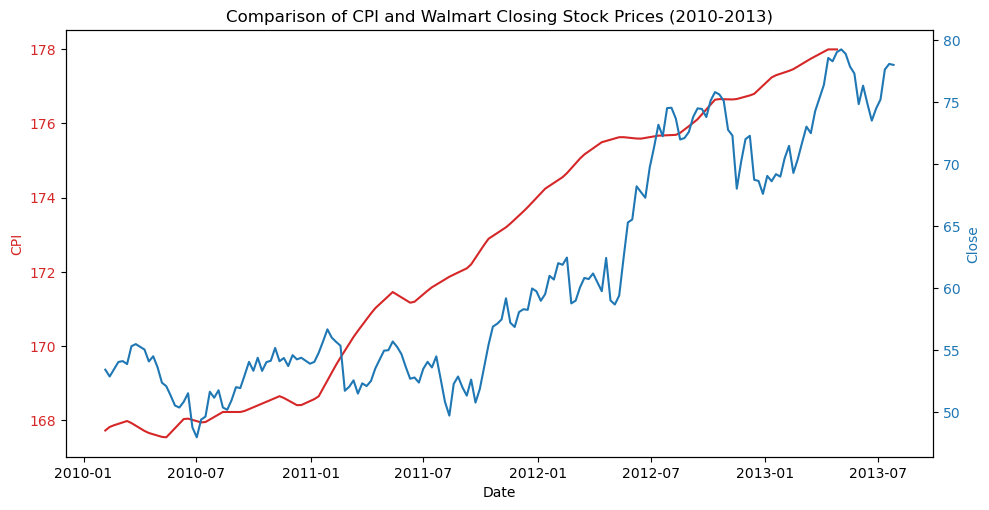

In [28]:
merged_data_final_with_close = pd.merge(average_cpi_data, wmt_2010_2013[['Date', 'Close']], on='Date', how='inner')
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color=color)
ax1.plot(merged_data_final_with_close['Date'], merged_data_final_with_close['CPI'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Close', color=color) 
ax2.plot(merged_data_final_with_close['Date'], merged_data_final_with_close['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Comparison of CPI and Walmart Closing Stock Prices (2010-2013)')
plt.show()


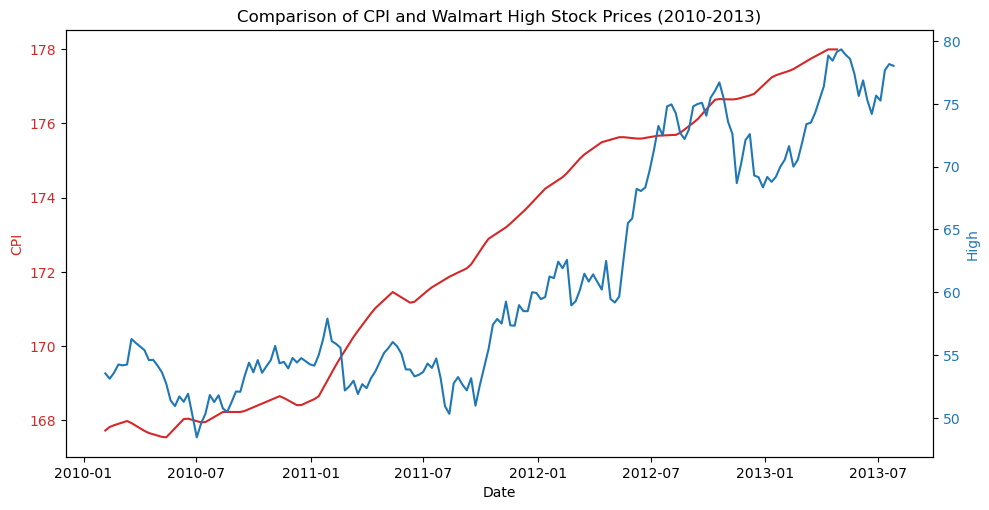

In [30]:
merged_data_final_with_high = pd.merge(average_cpi_data, wmt_2010_2013[['Date', 'High']], on='Date', how='inner')

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color=color)
ax1.plot(merged_data_final_with_high['Date'], merged_data_final_with_high['CPI'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:blue'
ax2.set_ylabel('High', color=color) 
ax2.plot(merged_data_final_with_high['Date'], merged_data_final_with_high['High'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Comparison of CPI and Walmart High Stock Prices (2010-2013)')
plt.show()


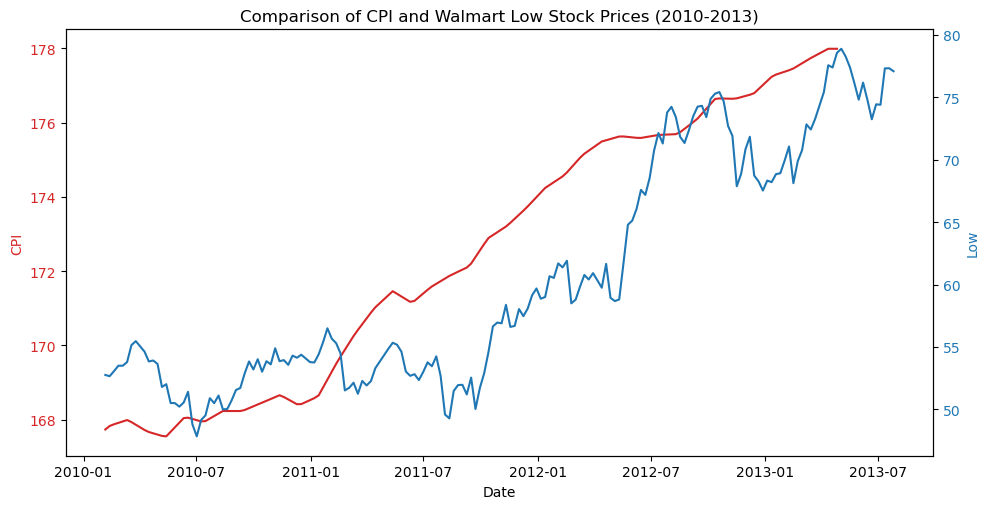

In [31]:
merged_data_final_with_low = pd.merge(average_cpi_data, wmt_2010_2013[['Date', 'Low']], on='Date', how='inner')

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color=color)
ax1.plot(merged_data_final_with_low['Date'], merged_data_final_with_low['CPI'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Low', color=color)  
ax2.plot(merged_data_final_with_low['Date'], merged_data_final_with_low['Low'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Comparison of CPI and Walmart Low Stock Prices (2010-2013)')
plt.show()


In [35]:
correlation_open = merged_data_final['CPI'].corr(merged_data_final['Open'])
correlation_close = merged_data_final_with_close['CPI'].corr(merged_data_final_with_close['Close'])
correlation_high = merged_data_final_with_high['CPI'].corr(merged_data_final_with_high['High'])
correlation_low = merged_data_final_with_low['CPI'].corr(merged_data_final_with_low['Low'])

print("CPI vs Open :",correlation_open)
print("CPI vs Close :", correlation_close)
print("CPI vs High :",correlation_high)
print("CPI vs Low :", correlation_low)


CPI vs Open : 0.8666361035581459
CPI vs Close : 0.8682166699472668
CPI vs High : 0.8681510050491543
CPI vs Low : 0.8673277775293712


This code is used to find and compare the correlation between CPI and the other variables, thus we can see genrerally they all have correlation coefficient values higher than 0.86, suggesting a very strong correlation between CPI and these variables. It can be concluded that CPI is a strong measure of stock performances.